In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving alt.atheism.txt.zip to alt.atheism.txt.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile('alt.atheism.txt.zip', 'r') as zip_ref:
    zip_ref.extractall('unzipped_data')

In [7]:
with open('unzipped_data/alt.atheism.txt', encoding='latin1') as f:
    lines = f.readlines()


In [9]:
df = pd.DataFrame(lines, columns=['text'])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (120487, 10000)


In [11]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(tfidf_matrix)
print("Shape after dimensionality reduction:", reduced_data.shape)

Shape after dimensionality reduction: (120487, 2)


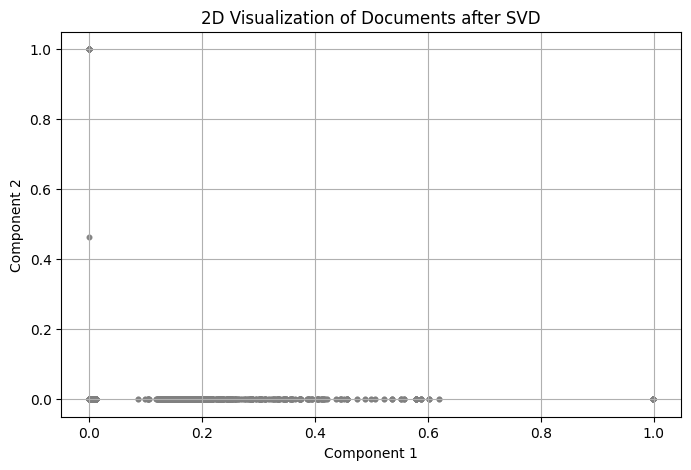

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='gray', alpha=0.7, s=10)
plt.title("2D Visualization of Documents after SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [13]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(reduced_data)

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, cluster_labels)
print(f"Silhouette Score for {num_clusters} clusters:", score)

Silhouette Score for 5 clusters: 0.9921596417310173


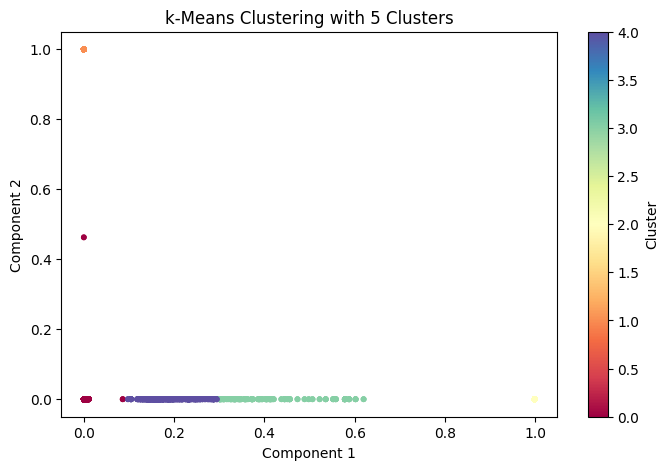

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='Spectral', s=10)
plt.title(f"k-Means Clustering with {num_clusters} Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [16]:
### EXPLANATION
## on performing TF-IDF , data is converted to high dimensional matrix, so this clustering becomes difficult, Therefore Dimensional Reduction is used.

## SVD AND PCA does dimensionality reduction by transforming high-dimensional data into a smaller number of new variables,
# finally providing only essential data by removing unnecessary data and makes the data visualisations easier

##  Clustering helps us discover natural groupings within the data, revealing structure and relationships between documents when labels are unknown
